In [2]:
# Import helpful packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

# Matplotlib setting for Jupyter Notebook
%matplotlib inline
plt.style.use('ggplot')

###scikit Learn Modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)


### Daten input
INPUT_FILE = "../input/hotel_bookings_manipuliert.csv"

df = pd.read_csv(INPUT_FILE, encoding='latin1')

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
output = "../output/"

PROFILE_FILE = os.path.join(output, "hotel_manipul.html")

profile.to_file(output_file=PROFILE_FILE)

C:\Users\dariu\AppData\Local\Temp\ipykernel_29748\4207165307.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Validierung mittels Confusion Matrix

In [4]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,2.227051,-1.634768,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,...,0,0,0,1,0,0,0,0,1,0
1,0,0,5.923385,-1.634768,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,...,0,0,0,1,0,0,0,0,1,0
2,0,0,-0.907814,-1.634768,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,...,0,0,0,1,0,0,0,0,1,0
3,0,0,-0.851667,-1.634768,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,...,0,0,0,1,0,0,0,0,1,0
4,0,0,-0.842309,-1.634768,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,-0.260659,...,0,0,0,1,0,0,0,0,1,0


In [6]:
# df.drop(['Unnamed: 0'], axis = 1, inplace = True)

### Vorbereitung des Datensatzes

In [7]:
y = df['is_canceled']
X = df.loc[:,df.columns != 'is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)


### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(
    penalty='elasticnet', C=1e42, solver='saga', l1_ratio = 0.5 , max_iter=500)
logreg.fit(X_train, y_train)
y_predicted_labels = logreg.predict(X_test)

d:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [9]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[21098,  1499],
       [ 5295,  7925]], dtype=int64)

Confusion matrix, without normalization
[[21098  1499]
 [ 5295  7925]]
Normalized confusion matrix
[[0.93 0.07]
 [0.4  0.6 ]]


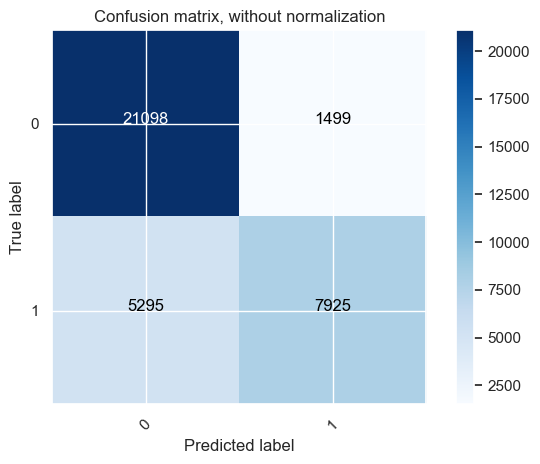

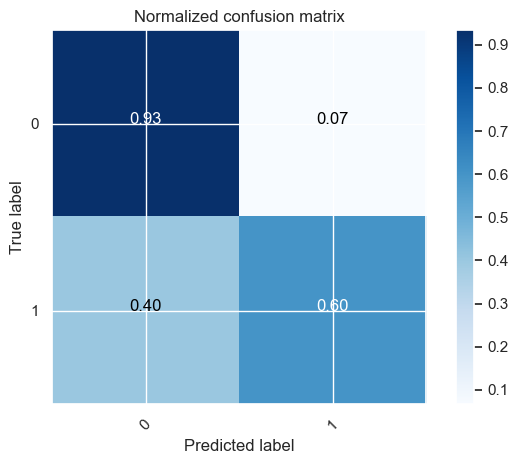

In [10]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [11]:
pd.DataFrame({'coeff': logreg.coef_[0]}, 
             index=X.columns)

,coeff
hotel,0.056553
lead_time,0.390594
arrival_date_year,0.068583
arrival_date_week_number,0.028590
arrival_date_day_of_month,-0.001944
stays_in_weekend_nights,0.040516
stays_in_week_nights,0.095124
adults,0.066790
children,0.071844
babies,0.025000


In [12]:
print("Accuracy on training set: {:.4f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(logreg.score(X_test, y_test)))

Accuracy on training set: 0.8084
Accuracy on test set: 0.8103


Hyperparameter Tuning log-Reg model

In [13]:
param_grid = {
    'solver': ["newton-cg","lbfgs", "liblinear", "sag", "saga"],
    'max_iter' :[100,150,200,1000],   
}

grid_search = GridSearchCV(logreg, param_grid, cv=3, verbose= 2 , n_jobs = -1)
grid_search.fit(X_train,y_train)

print(("best Logistic Regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


d:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
48 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports

best Logistic Regression from grid search: 0.810


d:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [14]:
grid_search.best_params_

{'max_iter': 1000, 'solver': 'saga'}

### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(
    criterion='gini', max_leaf_nodes=9, max_depth = 10, min_samples_leaf = 5, random_state=33)
tree.fit(X_train, y_train)

y_predicted_labels = tree.predict(X_test)

In [16]:
print("Accuracy on training set: {:.4f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.8103
Accuracy on test set: 0.8126


In [17]:
# Confusion Matrix
# Compute confusion matrix
cnf_matrix_dec_tree = confusion_matrix(y_test, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix_dec_tree

array([[21036,  1561],
       [ 5152,  8068]], dtype=int64)

Confusion matrix, without normalization
[[21036  1561]
 [ 5152  8068]]
Normalized confusion matrix
[[0.93 0.07]
 [0.39 0.61]]


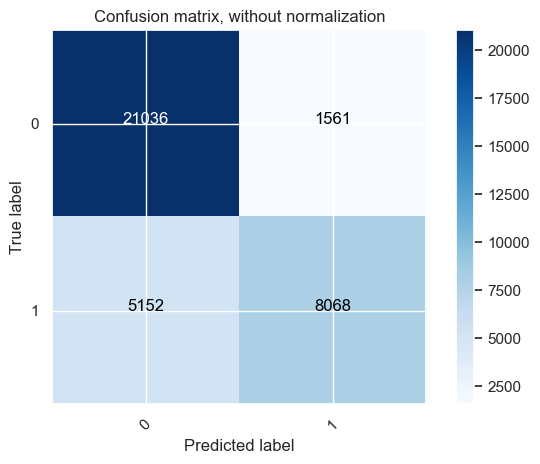

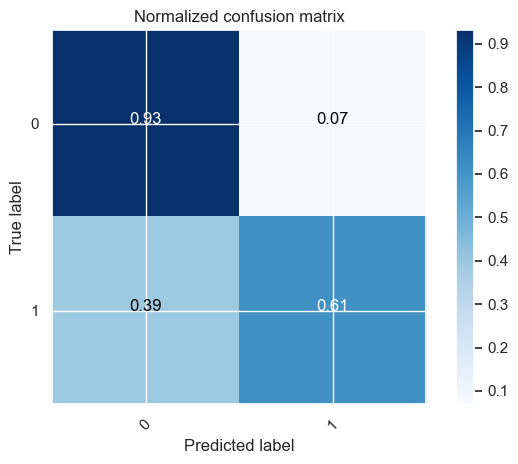

In [18]:
# With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix_dec_tree, classes=[0, 1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix_dec_tree, classes=[0, 1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(
    criterion='entropy', max_leaf_nodes=9, random_state=33)
tree.fit(X_train, y_train)
y_predicted_labels = tree.predict(X_test)

In [20]:
print("Accuracy on training set: {:.4f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.8063
Accuracy on test set: 0.8081


In [21]:
# Confusion Matrix
# Compute confusion matrix
cnf_matrix_dec_tree = confusion_matrix(y_test, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix_dec_tree

array([[20804,  1793],
       [ 5080,  8140]], dtype=int64)

Confusion matrix, without normalization
[[20804  1793]
 [ 5080  8140]]
Normalized confusion matrix
[[0.92 0.08]
 [0.38 0.62]]


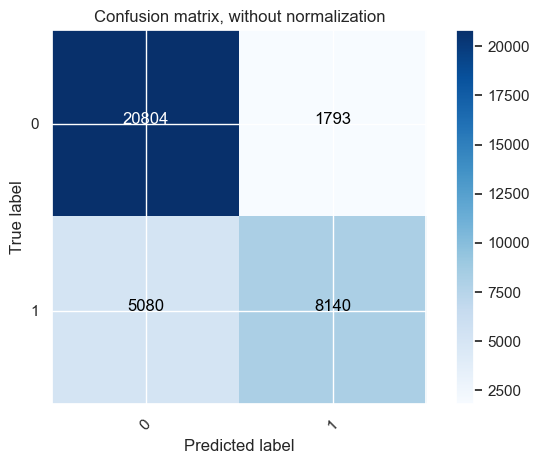

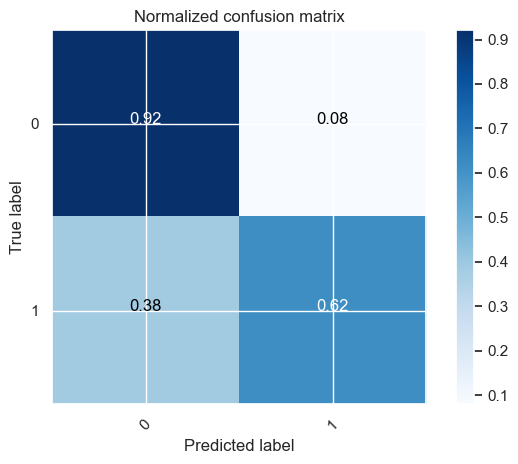

In [22]:
# With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix_dec_tree, classes=[0, 1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix_dec_tree, classes=[0, 1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


Use Grid search for best hyperparameters

In [23]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'max_leaf_nodes' : [3,5,9],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [24]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
CPU times: total: 10.8 s
Wall time: 31.6 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_leaf_nodes=9,
                                              random_state=33),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_leaf_nodes': [3, 5, 9],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [25]:
score_df = pd.DataFrame(grid_search.cv_results_)
print(score_df)
grid_search.best_params_

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.428130      0.051293         0.038193        0.011349   
1         0.527656      0.114631         0.045307        0.009738   
2         0.592915      0.198308         0.065328        0.053921   
3         0.521683      0.074270         0.067930        0.047128   
4         0.533800      0.170074         0.033846        0.005748   
..             ...           ...              ...             ...   
145       1.021784      0.183563         0.050293        0.020923   
146       1.068727      0.219757         0.029504        0.005291   
147       0.809592      0.112295         0.036497        0.018303   
148       0.891839      0.114666         0.027945        0.005481   
149       0.737810      0.027422         0.020994        0.004415   

    param_criterion param_max_depth param_max_leaf_nodes  \
0              gini               2                    3   
1              gini               2                

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 5}

<font size="4">**Interpretation des Modells**</font>

Um die Funktionsweise des Baums zusammenzufassen wird hier *Feature importance* betrachtet. Es zeigt, wie wichtig jedes Feature für die Entscheidung des Baums ist. Wenn ein Feature eine niedrige feature_importance hat, bedeutet das jedoch nicht, dass dieses Feature uninformativ ist. Es bedeutet nur, dass das Feature vom Baum nicht ausgewählt wurde, wahrscheinlich weil ein anderes Feature die gleiche Information kodiert [<sup>1</sup>](#fn1).

In unserem Fall sind sechs Features wichtig für den Baum, die auch in den folgenden Abbildungen zu sehen sind.

In [26]:
feature_imp = pd.Series(tree.feature_importances_,
                        index=X.columns).sort_values(ascending=False)
pd.DataFrame({'feature importances':feature_imp.values},
             index=feature_imp.index)

,feature importances
deposit_type_Non Refund,0.565648
required_car_parking_spaces,0.093336
previous_cancellations,0.092774
total_of_special_requests,0.080972
lead_time,0.080068
market_segment_Online TA,0.072901
agent,0.014300
distribution_channel_Direct,0.000000
distribution_channel_GDS,0.000000
distribution_channel_TA/TO,0.000000


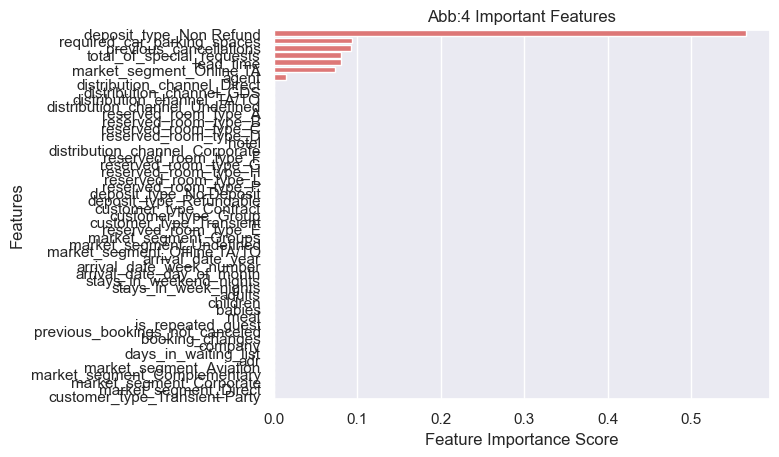

In [27]:
sns.barplot(x=feature_imp, y=feature_imp.index, color='#EE6666')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Abb:4 Important Features")
plt.show()

[Text(0.5555555555555556, 0.9375, 'deposit_type_Non Refund <= 0.5\nentropy = 0.951\nsamples = 83573\nvalue = [52569, 31004]'),
 Text(0.4444444444444444, 0.8125, 'required_car_parking_spaces <= 1.784\nentropy = 0.861\nsamples = 73343\nvalue = [52504, 20839]'),
 Text(0.3333333333333333, 0.6875, 'lead_time <= -0.894\nentropy = 0.888\nsamples = 68168\nvalue = [47329, 20839]'),
 Text(0.2222222222222222, 0.5625, 'entropy = 0.51\nsamples = 12526\nvalue = [11108, 1418]'),
 Text(0.4444444444444444, 0.5625, 'market_segment_Online TA <= 0.5\nentropy = 0.933\nsamples = 55642\nvalue = [36221, 19421]'),
 Text(0.2222222222222222, 0.4375, 'previous_cancellations <= 0.489\nentropy = 0.776\nsamples = 24305\nvalue = [18747, 5558]'),
 Text(0.1111111111111111, 0.3125, 'entropy = 0.706\nsamples = 23124\nvalue = [18679, 4445]'),
 Text(0.3333333333333333, 0.3125, 'entropy = 0.318\nsamples = 1181\nvalue = [68, 1113]'),
 Text(0.6666666666666666, 0.4375, 'total_of_special_requests <= -0.09\nentropy = 0.99\nsampl

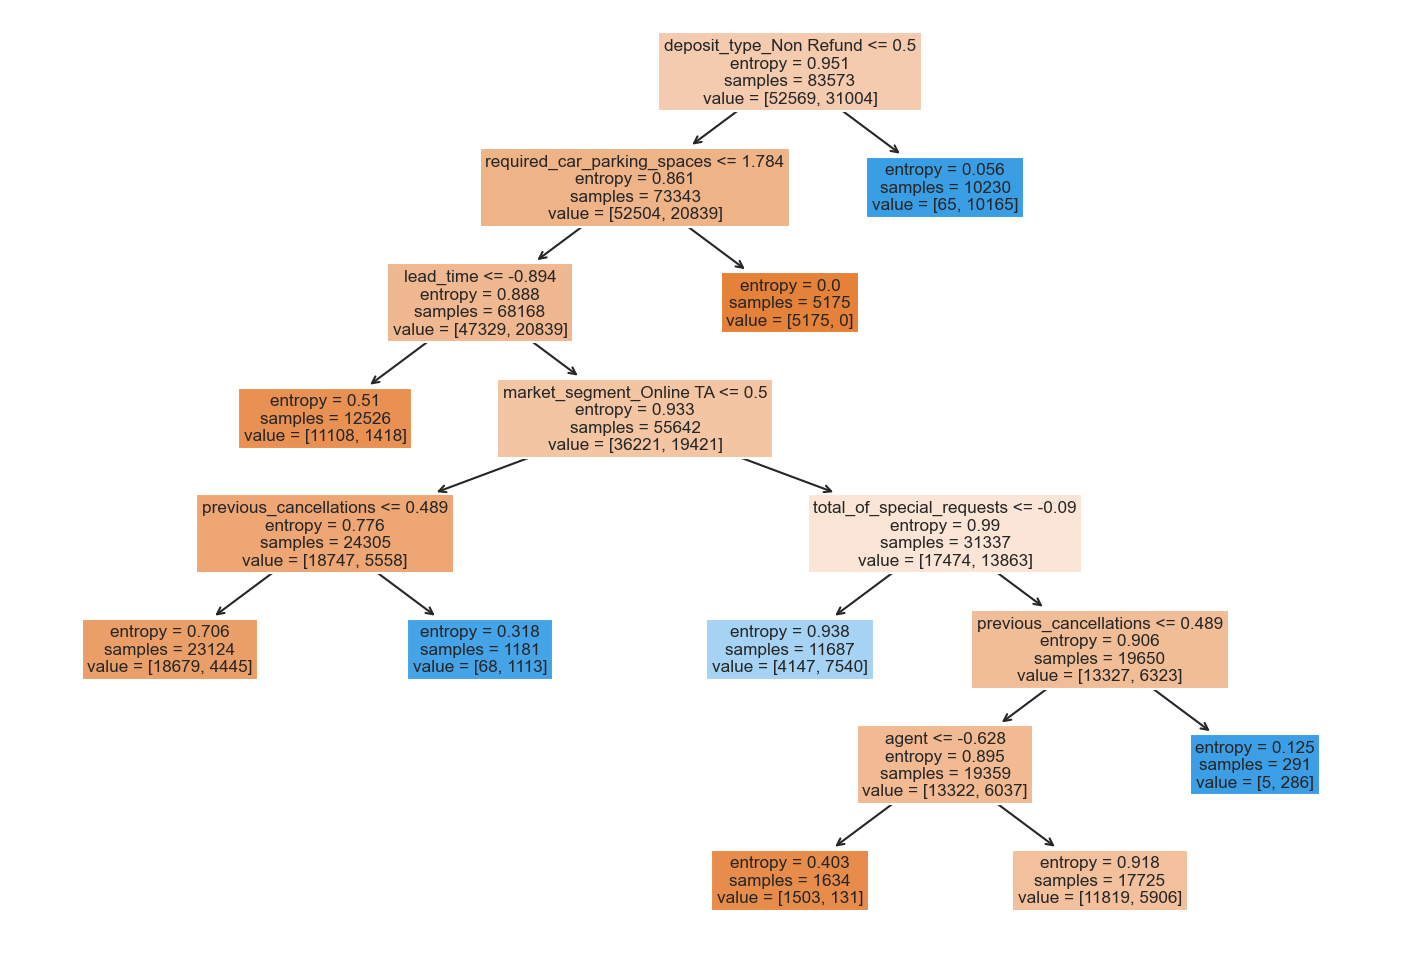

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree, filled=True, feature_names=X.columns)


In [29]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[20804,  1793],
       [ 5080,  8140]], dtype=int64)

Confusion matrix, without normalization
[[20804  1793]
 [ 5080  8140]]
Normalized confusion matrix
[[0.92 0.08]
 [0.38 0.62]]


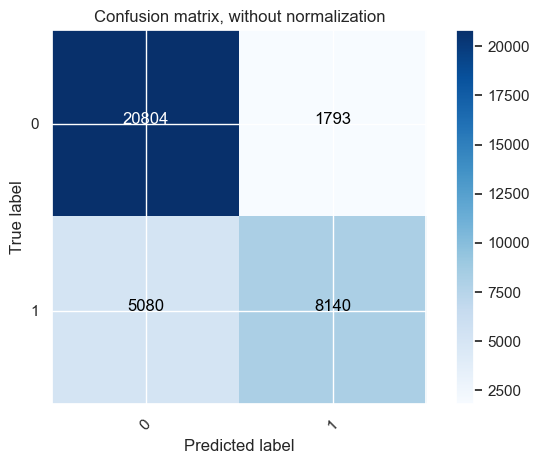

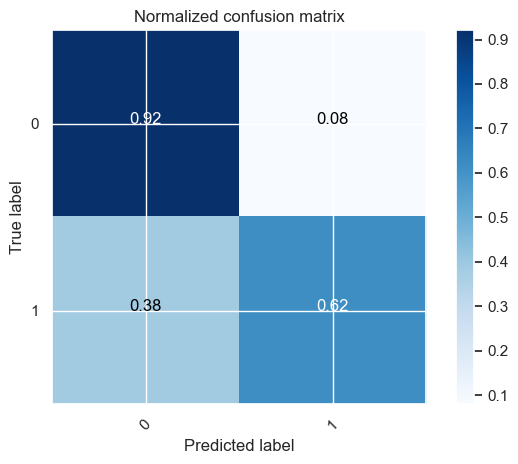

In [30]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(
    criterion='entropy', n_estimators=500, random_state=33)
forest.fit(X_train, y_train)
y_predicted_labels = forest.predict(X_test)

<font size="4">**Genauigkeit des Modells**</font>

In [32]:
print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.9915
Accuracy on test set: 0.8732


In [33]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix


array([[21069,  1528],
       [ 3015, 10205]], dtype=int64)

In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# from sklearn.metrics import average_precision_score

# Compute Precision-Recall and plot curve
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_labels)
area = auc(recall, precision)
print( "Area Under PR Curve(AP): %0.2f" % area ) #should be same as AP?

print( 'AP', average_precision_score(y_test, y_predicted_labels, average='weighted'))

Area Under PR Curve(AP): 0.86
AP 0.7555843283966738


Confusion matrix, without normalization
[[21069  1528]
 [ 3015 10205]]
Normalized confusion matrix
[[0.93 0.07]
 [0.23 0.77]]


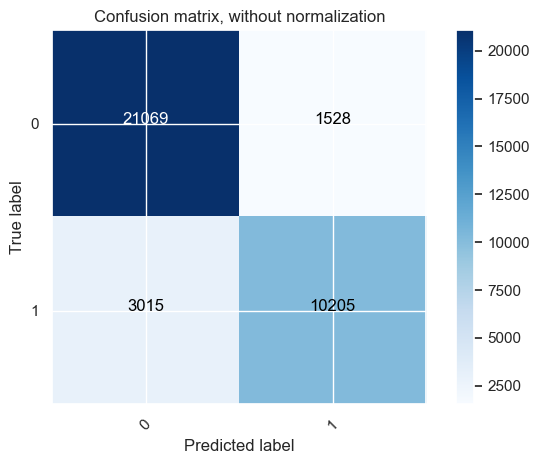

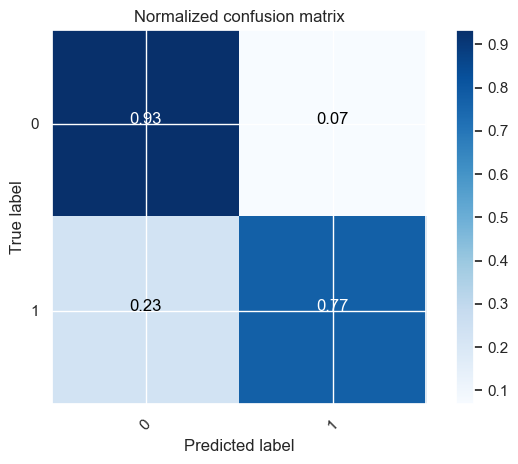

In [35]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

<font size="4">**Interpretation des Modells**</font>

Random Forest ist im Wesentlichen eine Sammlung von Decision Tree, wobei sich jeder Baum leicht von den anderen unterscheidet, um das Overfit-Problem von Decision Tree zu vermeiden. Das oben verwendete Modell enthält 400 Bäume, was die Schwierigkeit der Interpretation steigert. 

## Auswertung der Ergebnisse

Das Ergebnis des Modells liegt nahe, dass es variablen in den Daten gibt, die entweder sehr stark mit y correliert sind, oder vielleicht Probleme in der Messbarkeit beeinhalten

In [36]:
AccuracyCompare = {
    'Accuracy': pd.Series([logreg.score(X_test, y_test),
                           tree.score(X_test, y_test),
                           forest.score(X_test, y_test)],
                          index=['Logistic Regression', 
                                 'Decision Tree', 'Random Forest'])
}

pd.DataFrame(data=AccuracyCompare)

,Accuracy
Logistic Regression,0.810314
Decision Tree,0.808108
Random Forest,0.873161


## XGBoost als Alternative zum RF

In [37]:
import xgboost as xgb

In [38]:
xgb_m = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [39]:
# Booster parameter

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
        }


In [40]:

from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import StratifiedKFold


folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb_m, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )


random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[09:49:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001936F848580>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_...
                                           monotone_constraints=None,
                                           n_estimators=600, n_jobs=None,
                                           nthread=1, num_parallel_tree=None,
                                           predictor=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [41]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([63.67, 42.17, 37.52, 76.01, 60.22]), 'std_fit_time': array([0.13, 0.46, 0.45, 0.12, 4.11]), 'mean_score_time': array([0.42, 0.34, 0.34, 0.36, 0.3 ]), 'std_score_time': array([0.03, 0.02, 0.04, 0.01, 0.03]), 'param_subsample': masked_array(data=[0.8, 0.8, 1.0, 0.8, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[10, 10, 1, 10, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[5, 4, 4, 5, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.01, 0.2, 0.01, 0.001, 0.01],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1.5, 1, 1, 1.5, 1.5],
             mask=[Fa

In [42]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric = 'auc', 
random_state=33, n_estimators=500, learning_rate=0.2)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

Text(0.5, 0, 'Xgboost Feature Importance')

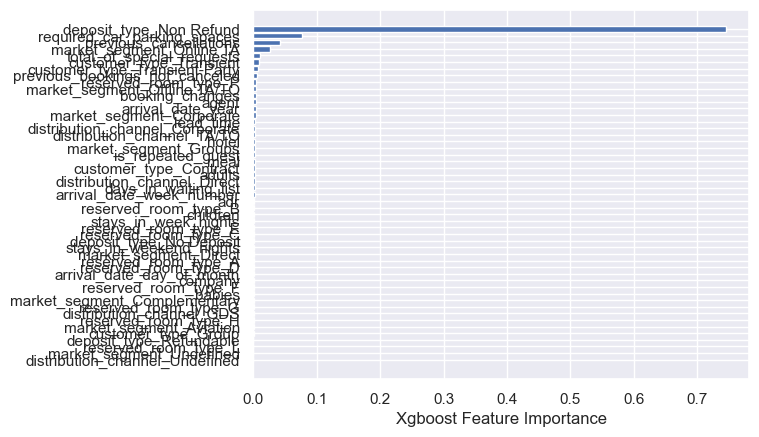

In [43]:
sorted_idx = xgb_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")


In [44]:
print("Accuracy on training set: {:.4f}".format(xgb_model.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(xgb_model.score(X_test, y_test)))

Accuracy on training set: 0.9045
Accuracy on test set: 0.8634


In [45]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# from sklearn.metrics import average_precision_score

# Compute Precision-Recall and plot curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
area = auc(recall, precision)
print( "Area Under PR Curve(AP): %0.2f" % area ) #should be same as AP?

print( 'AP', average_precision_score(y_test, y_pred, average='weighted'))
print( 'AP', average_precision_score(y_test, y_pred, average='macro'))
print( 'AP', average_precision_score(y_test, y_pred, average='micro'))
print( 'AP', average_precision_score(y_test, y_pred, average='samples'))

Area Under PR Curve(AP): 0.85
AP 0.7379636214508644
AP 0.7379636214508644
AP 0.7379636214508644
AP 0.7379636214508644


In [46]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cnf_matrix

array([[20919,  1678],
       [ 3213, 10007]], dtype=int64)

Confusion matrix, without normalization
[[20919  1678]
 [ 3213 10007]]
Normalized confusion matrix
[[0.93 0.07]
 [0.24 0.76]]


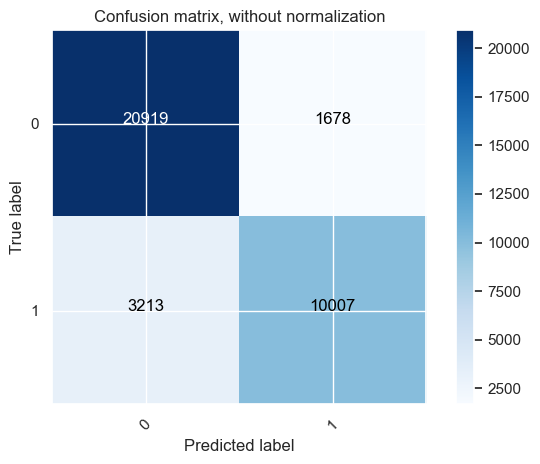

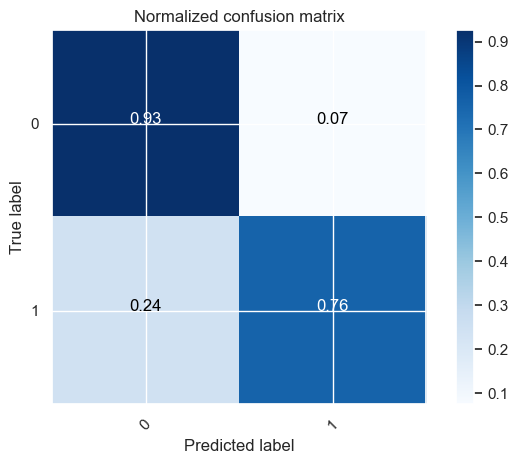

In [47]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [48]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [49]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

Precision: 0.8563970902866923
Recall: 0.7569591527987897
F1-Score: 0.8036137321822927
ROC-AUC: 0.8413507539893403


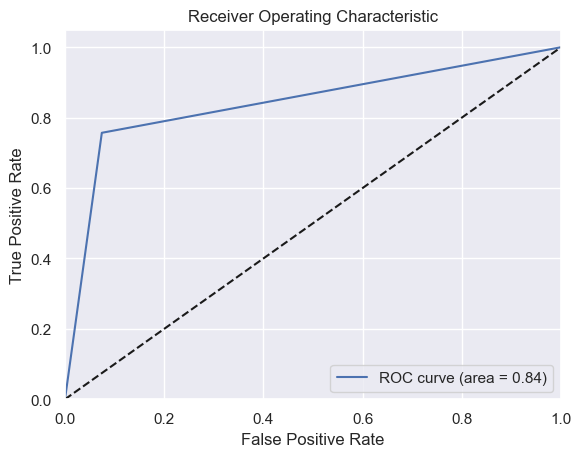

AUC: 0.8413507539893403


In [50]:
from sklearn.metrics import roc_curve, auc
 
# Berechne die ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
 
# Zeichne die ROC-Kurve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie für den Zufalls-Classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
 
# Gib den AUC-Wert aus
print("AUC:", roc_auc)

## Fußnote
<span id="fn1">1: Vgl. Müller & Guido, 2017, S. 77f.</span>